#**Employee Salary Prediction Using Linear Regression**

**Import Packages and Libraries**

In [1]:
import pandas as pd

**Read CSV File**

In [2]:
salary_data = pd.read_csv('Employee_Salary.csv')
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


##**Data Exploration**

In [3]:
salary_data.shape

(375, 6)

In [4]:
salary_data.columns = ['age', 'gender', 'education_level', 'job_title', 'experience_years', 'salary']

In [5]:
salary_data.dtypes

,0
age,float64
gender,object
education_level,object
job_title,object
experience_years,float64
salary,float64


In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               373 non-null    float64
 1   gender            373 non-null    object 
 2   education_level   373 non-null    object 
 3   job_title         373 non-null    object 
 4   experience_years  373 non-null    float64
 5   salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
import seaborn as sb
import matplotlib

##**Data Cleaning**

In [8]:
salary_data = salary_data = salary_data.drop_duplicates(keep = 'first')

In [9]:
salary_data.dropna(how = 'any', inplace=True)

<ipython-input-9-313b8db1484a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data.dropna(how = 'any', inplace=True)


In [10]:
salary_data.head()

,age,gender,education_level,job_title,experience_years,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


##**Exploratory Data Analysis**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
salary_data.describe()

,age,experience_years,salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


**Correlation Matric amoung Numerical Features**

In [13]:
corr = salary_data[['age','experience_years','salary']].corr()
corr

,age,experience_years,salary
age,1.000000,0.979192,0.916543
experience_years,0.979192,1.000000,0.924455
salary,0.916543,0.924455,1.000000


<Axes: >

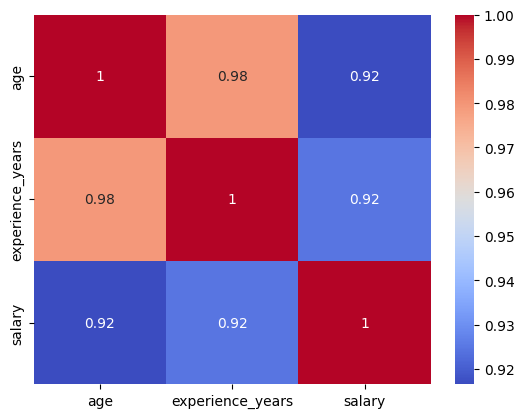

In [14]:
sns.heatmap(corr, annot=True, cmap="coolwarm")

**Data Visualization - Bar Chart, Blox Plot, Histogram**

In [15]:
salary_data['education_level'].value_counts()

,count
education_level,
Bachelor's,191
Master's,91
PhD,42


<Axes: ylabel='education_level'>

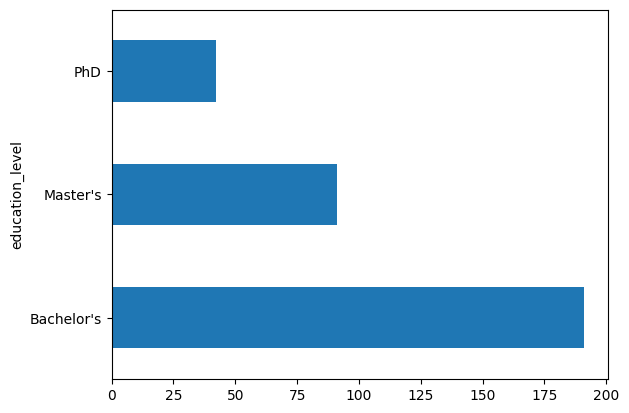

In [16]:
salary_data['education_level'].value_counts().plot(kind='barh')

In [17]:
salary_data['job_title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [18]:
salary_data['job_title'].value_counts()

,count
job_title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Business Analyst,6
...,...
Business Development Manager,1
Customer Service Representative,1
IT Manager,1


<Axes: xlabel='job_title'>

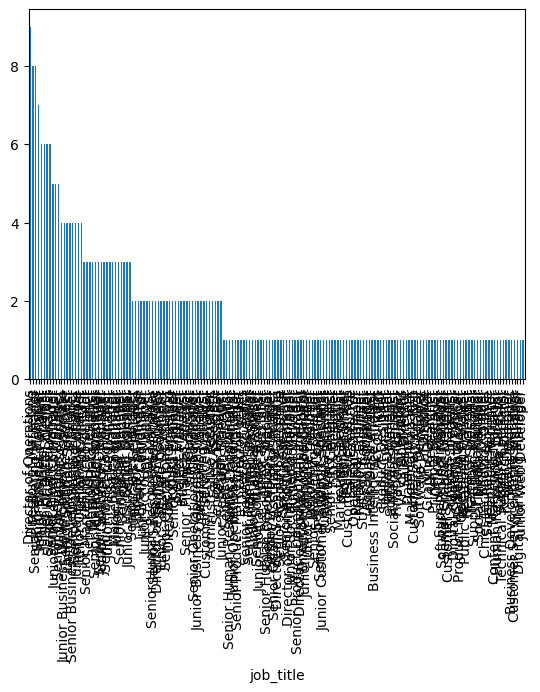

In [19]:
salary_data['job_title'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

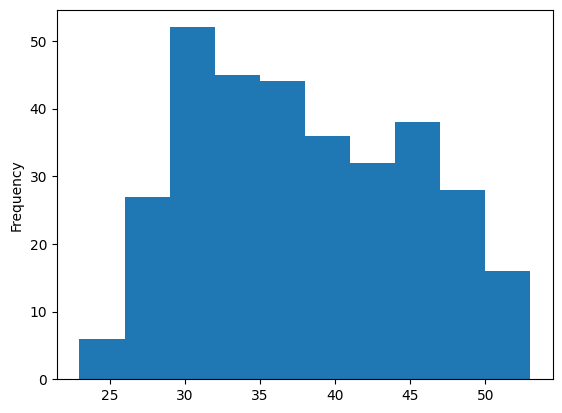

In [20]:
salary_data.age.plot(kind = 'hist')

<Axes: >

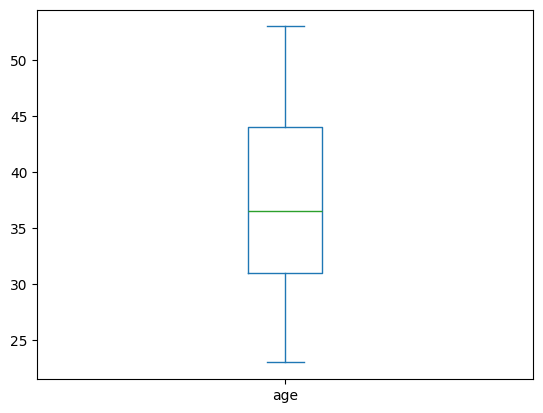

In [21]:
salary_data.age.plot(kind = 'box')

<Axes: ylabel='gender'>

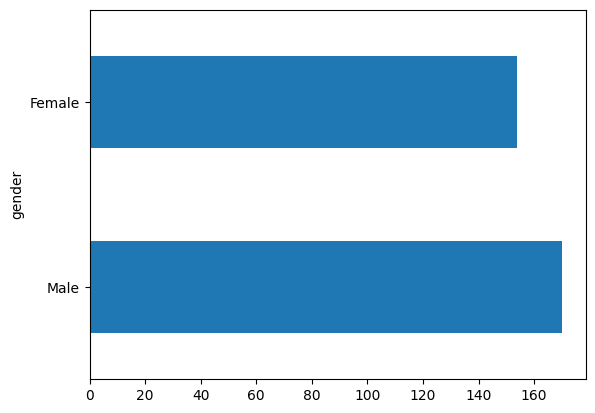

In [22]:
salary_data['gender'].value_counts().plot(kind='barh')

**Scatterplot with  Salary**

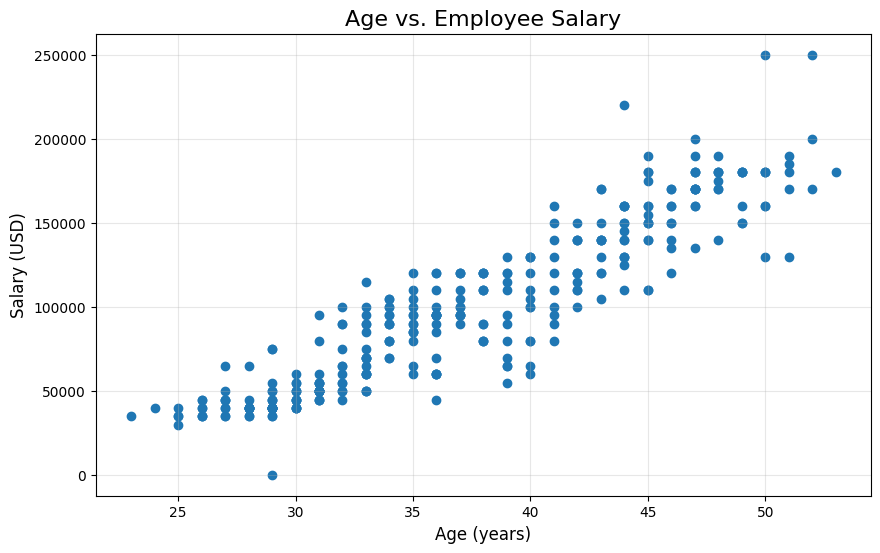

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(salary_data['age'], salary_data['salary'])
plt.title('Age vs. Employee Salary', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(alpha=0.3)

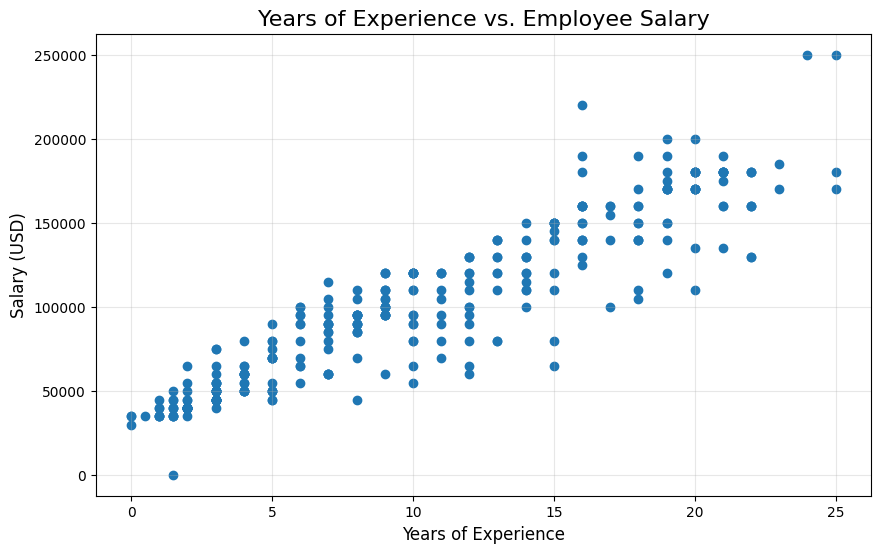

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(salary_data['experience_years'], salary_data['salary'])
plt.title('Years of Experience vs. Employee Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(alpha=0.3)

##**Data Transformation**

###**Feature Engineering**

**Label Encoding:**

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [26]:
salary_data['gender'] = label_encoder.fit_transform(salary_data['gender'])

In [27]:
salary_data['education_level'] = label_encoder.fit_transform(salary_data['education_level'])

In [28]:
salary_data['job_title'] = label_encoder.fit_transform(salary_data['job_title'])

**Data after Label Encoding**

In [29]:
salary_data.head()

,age,gender,education_level,job_title,experience_years,salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


**Feature Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [31]:
salary_data['age'] = standard_scaler.fit_transform(salary_data[['age']])
salary_data['experience_years'] = standard_scaler.fit_transform(salary_data[['experience_years']])

**Data after Feature Scaling**

In [32]:
salary_data.head()

,age,gender,education_level,job_title,experience_years,salary
0,-0.750231,1,0,159,-0.761821,90000.0
1,-1.307742,0,1,17,-1.063017,65000.0
2,1.061680,1,2,130,0.744158,150000.0
3,-0.192720,0,0,101,-0.460625,60000.0
4,2.037324,1,1,22,1.497148,200000.0


**Dependent and Independent Feature**

In [33]:
X = salary_data[['age','gender','education_level','job_title','experience_years']]
y = salary_data['salary']

In [34]:
X.head()

,age,gender,education_level,job_title,experience_years
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


**Splitting the data into Training and Testing (80/20)**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,age,gender,education_level,job_title,experience_years
73,-1.307742,1,0,166,-1.213615
182,0.922302,0,2,155,0.744158
17,0.225413,1,2,116,0.292364
24,0.504169,1,1,37,0.442962
146,0.643547,0,2,115,0.894756


In [38]:
X_train.shape, y_train.shape #80%

((259, 5), (259,))

In [39]:
X_test.shape, y_test.shape #20%

((65, 5), (65,))

###**Model Development**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lin_reg_model = LinearRegression()

**Model Training**

In [42]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

**Model Predictions**

In [43]:
y_pred_lr = lin_reg_model.predict(X_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [44]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': y_pred_lr })
df['Error'] = df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


**Model Evaulation**

In [45]:
Mean_absolute_Error = df['Error'].mean()
Mean_absolute_Error

176.87812587556692

**Model Accuracy**

In [46]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
acc_r2 = r2_score(y_test, y_pred_lr)
acc_r2
print(f'Accuracy of the model = {round(acc_r2, 4)*100}%')

Accuracy of the model = 89.11%


**Mean Absolute Error**

In [48]:
mae = round(mean_absolute_error(y_test, y_pred_lr),2)
mae
print(f'Mean Absolute Error = {mae}')

Mean Absolute Error = 10570.79


**Mean Squared Error**

In [49]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse
print(f'Mean Squared Error = {mse}')

Mean Squared Error = 205754135.72


**Coefficient**

In [50]:
lin_reg_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

**Intercepts**

In [51]:
lin_reg_model.intercept_

86001.49320553159

**Decision Trees**

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [70]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [72]:
y_pred = clf.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.26


**Testing Predicitons**

To predict the salary for Mrs. Brown, we will use this model:

*   **Age** = 49
*   **Gender** = 'Female' = 0
*   **Degree** = 'PhD' = 2
*   **Job Title** = 'Director' = 22
*   **Experience_years** = 15
*   **Salary** = ?

In [ ]:
age1 = standard_scaler.transform([[49]])
age = 5.86448677
gender = 0
education_level = 2
job_title = 22
experience_years = 0.74415815
#Find the Salary = ?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
standard_scaler.transform([[15]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.7441581452572275

In [ ]:
Emp_Salary = lin_reg_model.predict([[age, gender, education_level, job_title, experience_years]])
Emp_Salary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249925.15061728])

In [ ]:
print("Predicted Employee Salary is $", round(Emp_Salary[0],2))

Predicted Employee Salary is $ 249925.15


In [88]:
import joblib
joblib.dump(lin_reg_model, 'salary_predictor.pkl')

['salary_predictor.pkl']